<a href="https://www.kaggle.com/code/sonawanelalitsunil/appendix-cancer-prediction-ml-xgb?scriptVersionId=221598033" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/appendix-cancer-prediction-dataset/appendix_cancer_prediction_dataset.csv


# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Appendix Cancer Prediction|ML|</p>

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import Libraries</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import Dataset</p>

In [4]:
data = pd.read_csv("/kaggle/input/appendix-cancer-prediction-dataset/appendix_cancer_prediction_dataset.csv")

In [5]:
data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


In [6]:
data.tail()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
259995,PID_259996,USA,33,Male,22.3,No,Low,No,No,Diabetes,...,159,7.5,5.2,344,Negative,Moderate,67,Surgery,1.7,No
259996,PID_259997,Australia,45,Female,27.5,Yes,Moderate,Yes,No,Hypertension,...,268,8.0,5.0,195,Negative,Moderate,578,Radiation,0.4,Yes
259997,PID_259998,South Africa,76,Male,27.9,Yes,Moderate,No,No,NaN,...,156,7.8,5.5,201,Positive,Moderate,670,Chemotherapy,0.0,No
259998,PID_259999,China,68,Female,24.0,No,Low,No,No,NaN,...,226,7.9,5.1,386,Negative,Moderate,316,Radiation,8.1,No
259999,PID_260000,Brazil,56,Female,22.7,No,Low,No,Yes,NaN,...,270,6.0,4.8,339,Negative,Moderate,687,Surgery,7.3,No


In [7]:
data.describe()

,Age,BMI,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Diagnosis_Delay_Days,Survival_Years_After_Diagnosis
count,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000
mean,53.443331,24.996457,134.490342,224.477227,7.000596,4.999148,274.433846,365.181450,4.989499
std,20.750951,4.997116,25.961207,43.266553,1.496819,0.501531,72.207496,210.924211,4.976837
min,18.000000,1.100000,90.000000,150.000000,0.500000,2.800000,150.000000,0.000000,0.000000
25%,36.000000,21.600000,112.000000,187.000000,6.000000,4.700000,212.000000,182.000000,1.400000
50%,53.000000,25.000000,134.000000,224.000000,7.000000,5.000000,275.000000,366.000000,3.500000
75%,71.000000,28.400000,157.000000,262.000000,8.000000,5.300000,337.000000,548.000000,6.900000
max,89.000000,48.100000,179.000000,299.000000,13.700000,7.600000,399.000000,729.000000,67.800000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [9]:
data.dtypes

Patient_ID                         object
Country                            object
Age                                 int64
Gender                             object
BMI                               float64
Smoking_Status                     object
Alcohol_Consumption                object
Family_History_Cancer              object
Genetic_Mutations                  object
Chronic_Diseases                   object
Physical_Activity_Level            object
Diet_Type                          object
Radiation_Exposure                 object
Previous_Cancers                   object
Blood_Pressure                      int64
Cholesterol_Level                   int64
White_Blood_Cell_Count            float64
Red_Blood_Cell_Count              float64
Platelet_Count                      int64
Tumor_Markers                      object
Symptom_Severity                   object
Diagnosis_Delay_Days                int64
Treatment_Type                     object
Survival_Years_After_Diagnosis    

In [10]:
data.shape

(260000, 25)

In [11]:
data.isnull().sum()

Patient_ID                             0
Country                                0
Age                                    0
Gender                                 0
BMI                                    0
Smoking_Status                         0
Alcohol_Consumption                    0
Family_History_Cancer                  0
Genetic_Mutations                      0
Chronic_Diseases                  130087
Physical_Activity_Level                0
Diet_Type                              0
Radiation_Exposure                     0
Previous_Cancers                       0
Blood_Pressure                         0
Cholesterol_Level                      0
White_Blood_Cell_Count                 0
Red_Blood_Cell_Count                   0
Platelet_Count                         0
Tumor_Markers                          0
Symptom_Severity                       0
Diagnosis_Delay_Days                   0
Treatment_Type                     26074
Survival_Years_After_Diagnosis         0
Appendix_Cancer_

In [12]:
data.isnull().sum().sum()

156161

In [13]:
categorical_cols = data.select_dtypes(include='object').columns

unique_values_summary = {
    col: data[col].value_counts().to_dict() for col in categorical_cols
}

data_summary = pd.DataFrame(unique_values_summary).fillna(0)
data_summary

,Patient_ID,Country,Gender,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Tumor_Markers,Symptom_Severity,Treatment_Type,Appendix_Cancer_Prediction
PID_000001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PID_173339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PID_173326,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PID_173327,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PID_173328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mild,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129761.0,0.0,0.0
Severe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39042.0,0.0,0.0
Surgery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103398.0,0.0
Chemotherapy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78269.0,0.0


In [14]:
numerical_cols = data.select_dtypes(include=[np.number]).columns

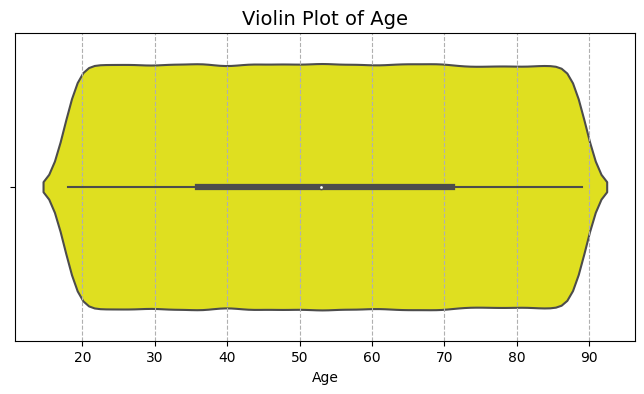

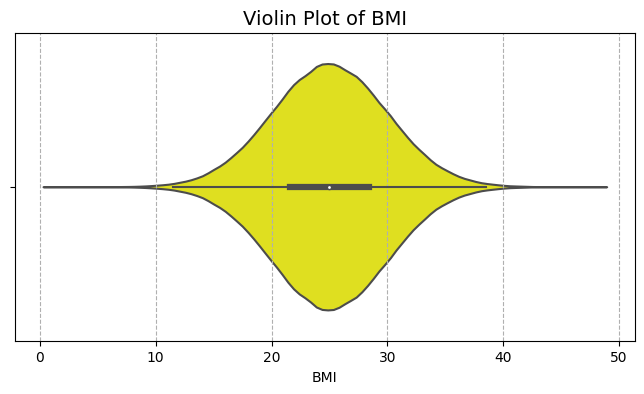

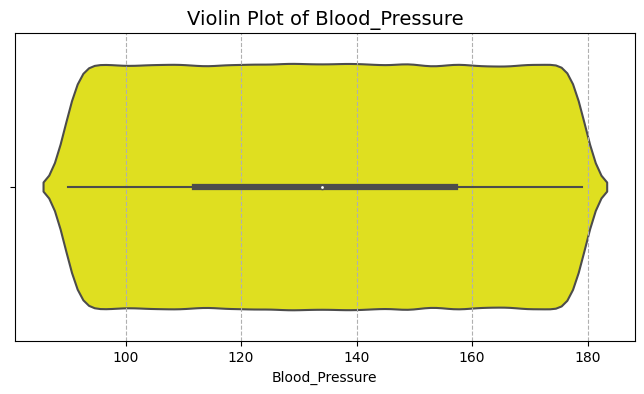

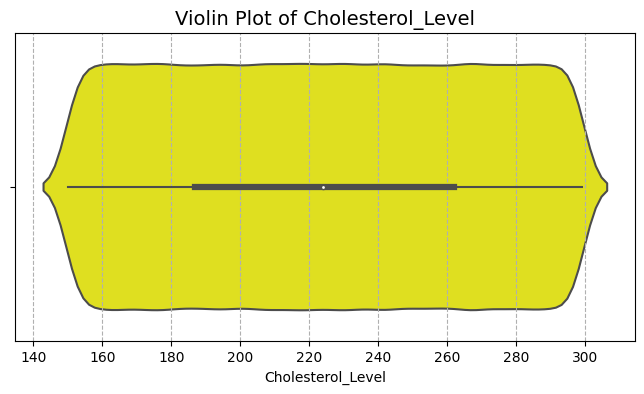

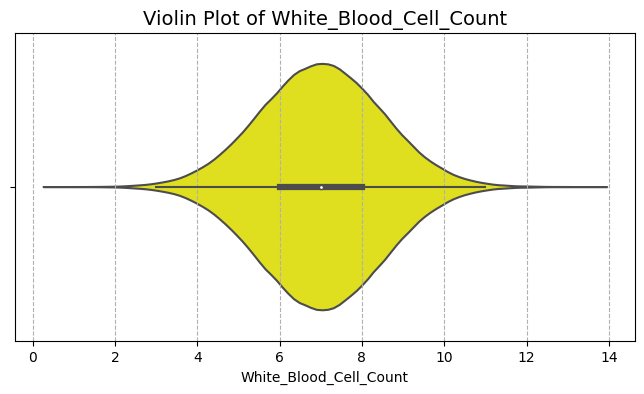

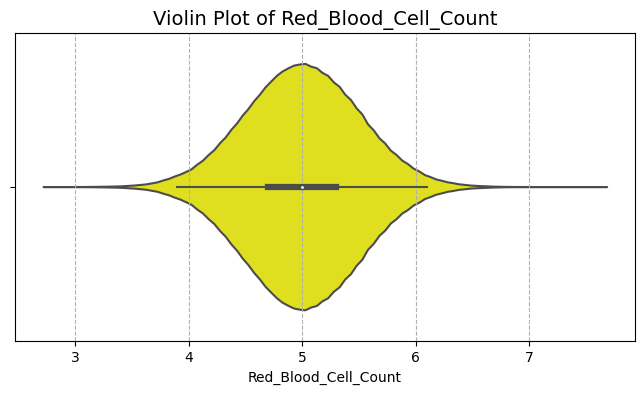

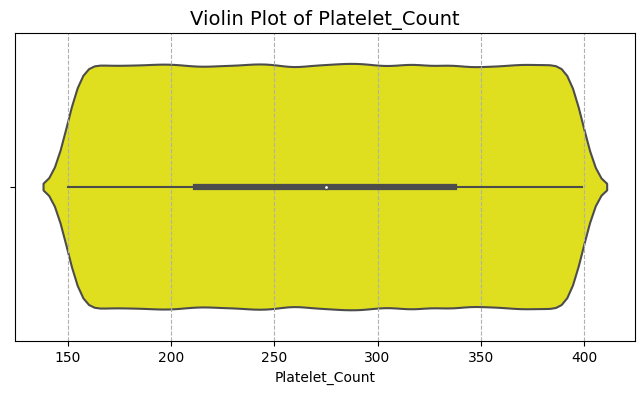

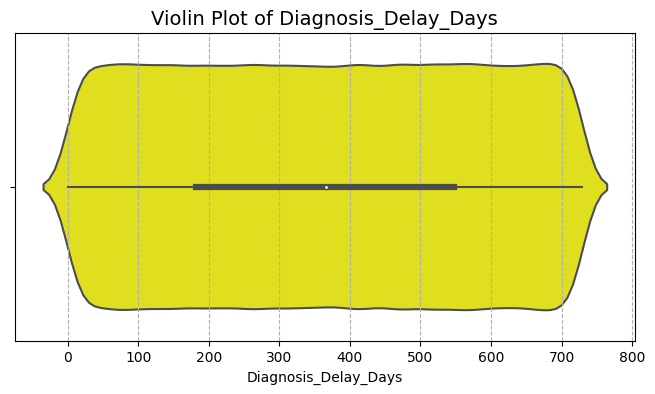

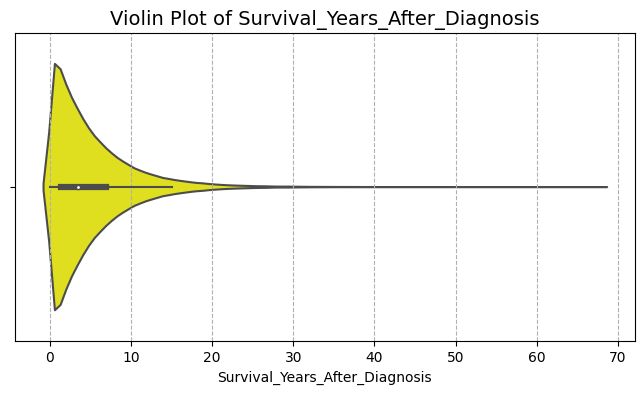

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=data[col], color='yellow')
    plt.title(f'Violin Plot of {col}', fontsize=14)
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--')
    plt.show()

In [16]:
data["Chronic_Diseases"] = data["Chronic_Diseases"].fillna("None")

In [17]:
data["Treatment_Type"] = data["Treatment_Type"].fillna("No Treatment")

In [18]:
data.head(15)

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,None,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No
5,PID_000006,USA,44,Male,21.2,No,Low,No,Yes,Hypertension,...,270,6.9,4.9,397,Negative,Mild,309,Radiation,3.7,No
6,PID_000007,USA,43,Female,26.4,No,Low,Yes,No,None,...,224,10.3,4.6,355,Negative,Moderate,359,Surgery,8.6,Yes
7,PID_000008,Japan,87,Female,21.3,No,Moderate,No,No,None,...,194,6.2,4.5,375,Negative,Moderate,479,Surgery,4.9,No
8,PID_000009,Russia,60,Male,19.7,No,High,No,No,None,...,165,6.3,4.9,277,Negative,Severe,402,Surgery,5.0,No
9,PID_000010,UK,47,Male,20.1,Yes,High,No,No,Hypertension,...,266,6.4,5.5,218,Negative,Mild,294,Surgery,5.0,No


## EDA

In [19]:
data.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Alcohol_Consumption', 'Family_History_Cancer', 'Genetic_Mutations',
       'Chronic_Diseases', 'Physical_Activity_Level', 'Diet_Type',
       'Radiation_Exposure', 'Previous_Cancers', 'Blood_Pressure',
       'Cholesterol_Level', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count',
       'Platelet_Count', 'Tumor_Markers', 'Symptom_Severity',
       'Diagnosis_Delay_Days', 'Treatment_Type',
       'Survival_Years_After_Diagnosis', 'Appendix_Cancer_Prediction'],
      dtype='object')

## Numarical columns

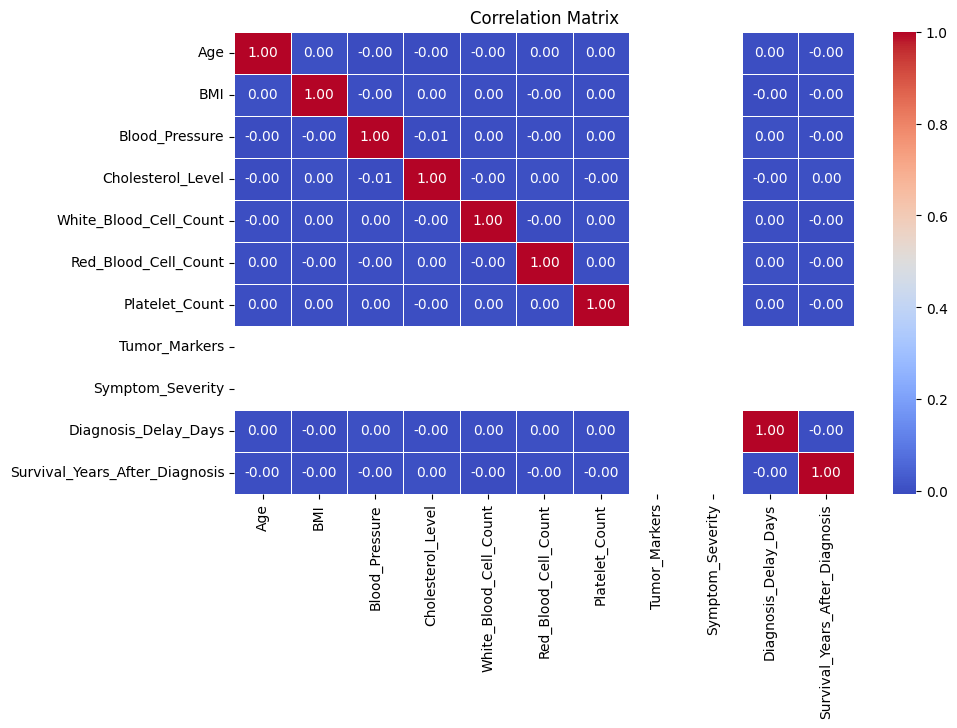

In [20]:
# Filter numerical columns and ensure they contain numeric values only
numerical_cols = [
    'Age', 'BMI', 'Blood_Pressure', 'Cholesterol_Level', 'White_Blood_Cell_Count',
    'Red_Blood_Cell_Count', 'Platelet_Count', 'Tumor_Markers', 'Symptom_Severity',
    'Diagnosis_Delay_Days', 'Survival_Years_After_Diagnosis'
]

# Check and convert columns to numeric if possible (this will handle any non-numeric values)
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix only for numeric columns
correlation_matrix = data[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Categorical columns

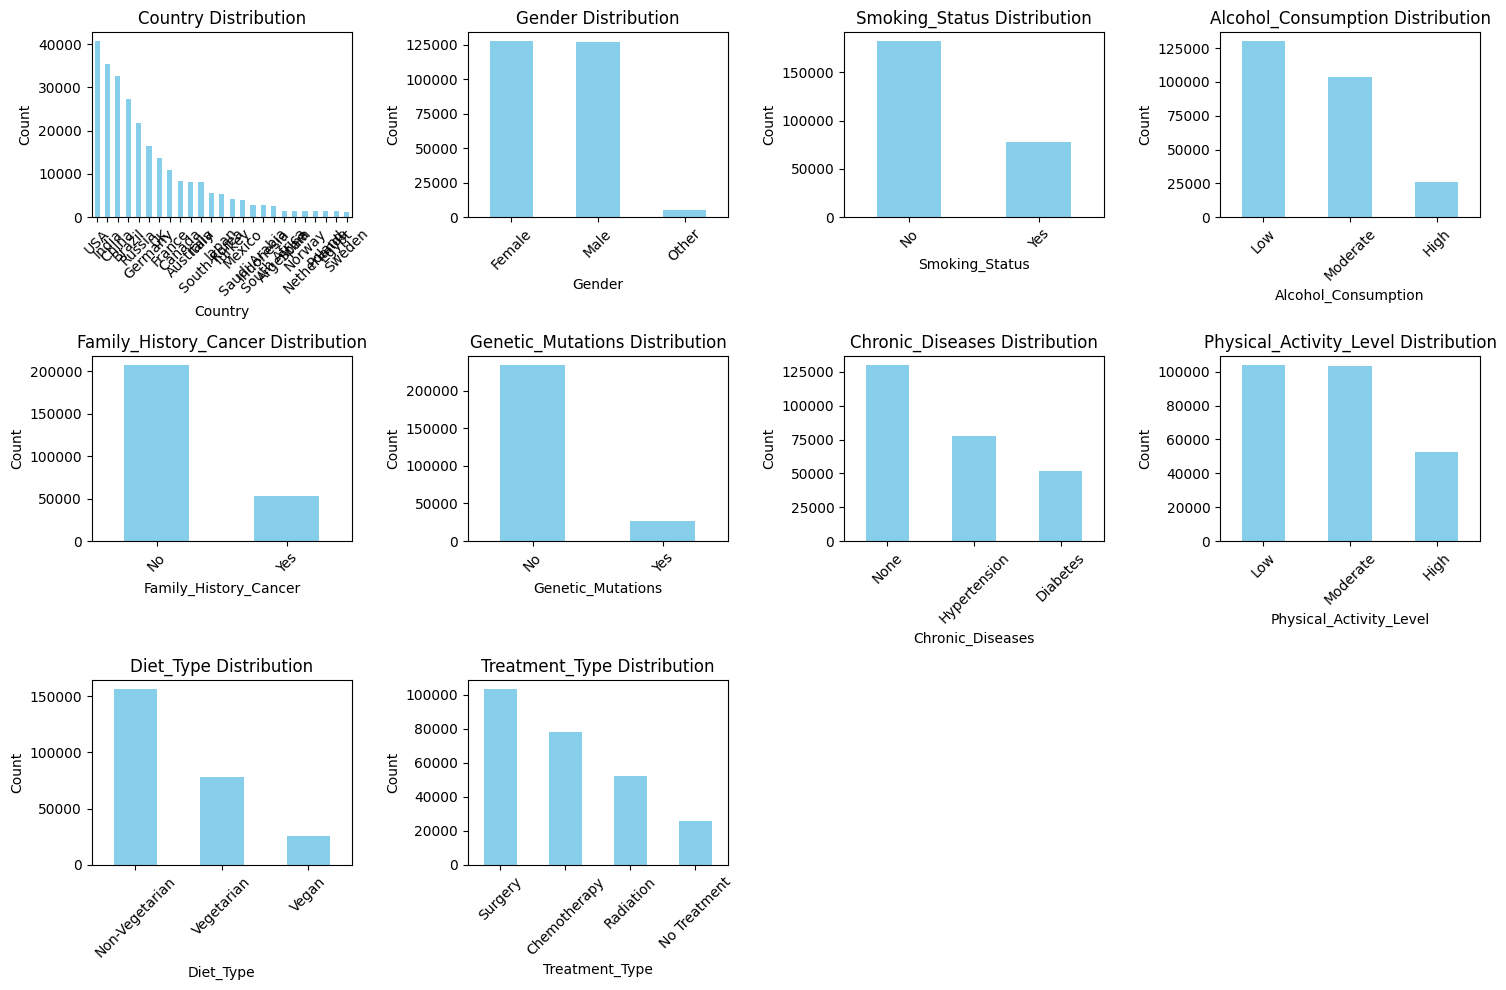

Unique values in Country: ['China' 'Saudi Arabia' 'France' 'Russia' 'USA' 'Japan' 'UK' 'Spain'
 'Australia' 'India' 'Brazil' 'Germany' 'Italy' 'Argentina' 'Canada'
 'Mexico' 'Indonesia' 'South Korea' 'Turkey' 'Norway' 'South Africa'
 'Poland' 'Netherlands' 'Egypt' 'Sweden']
Unique values in Gender: ['Female' 'Male' 'Other']
Unique values in Smoking_Status: ['No' 'Yes']
Unique values in Alcohol_Consumption: ['Low' 'Moderate' 'High']
Unique values in Family_History_Cancer: ['Yes' 'No']
Unique values in Genetic_Mutations: ['No' 'Yes']
Unique values in Chronic_Diseases: ['Diabetes' 'None' 'Hypertension']
Unique values in Physical_Activity_Level: ['High' 'Low' 'Moderate']
Unique values in Diet_Type: ['Non-Vegetarian' 'Vegetarian' 'Vegan']
Unique values in Treatment_Type: ['Surgery' 'Chemotherapy' 'Radiation' 'No Treatment']


In [21]:
categorical_cols = [
    'Country', 'Gender', 'Smoking_Status', 'Alcohol_Consumption', 'Family_History_Cancer',
    'Genetic_Mutations', 'Chronic_Diseases', 'Physical_Activity_Level', 'Diet_Type',
    'Treatment_Type'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{col} Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
for col in categorical_cols:
    print(f"Unique values in {col}: {data[col].unique()}")

##

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">EDA</p>

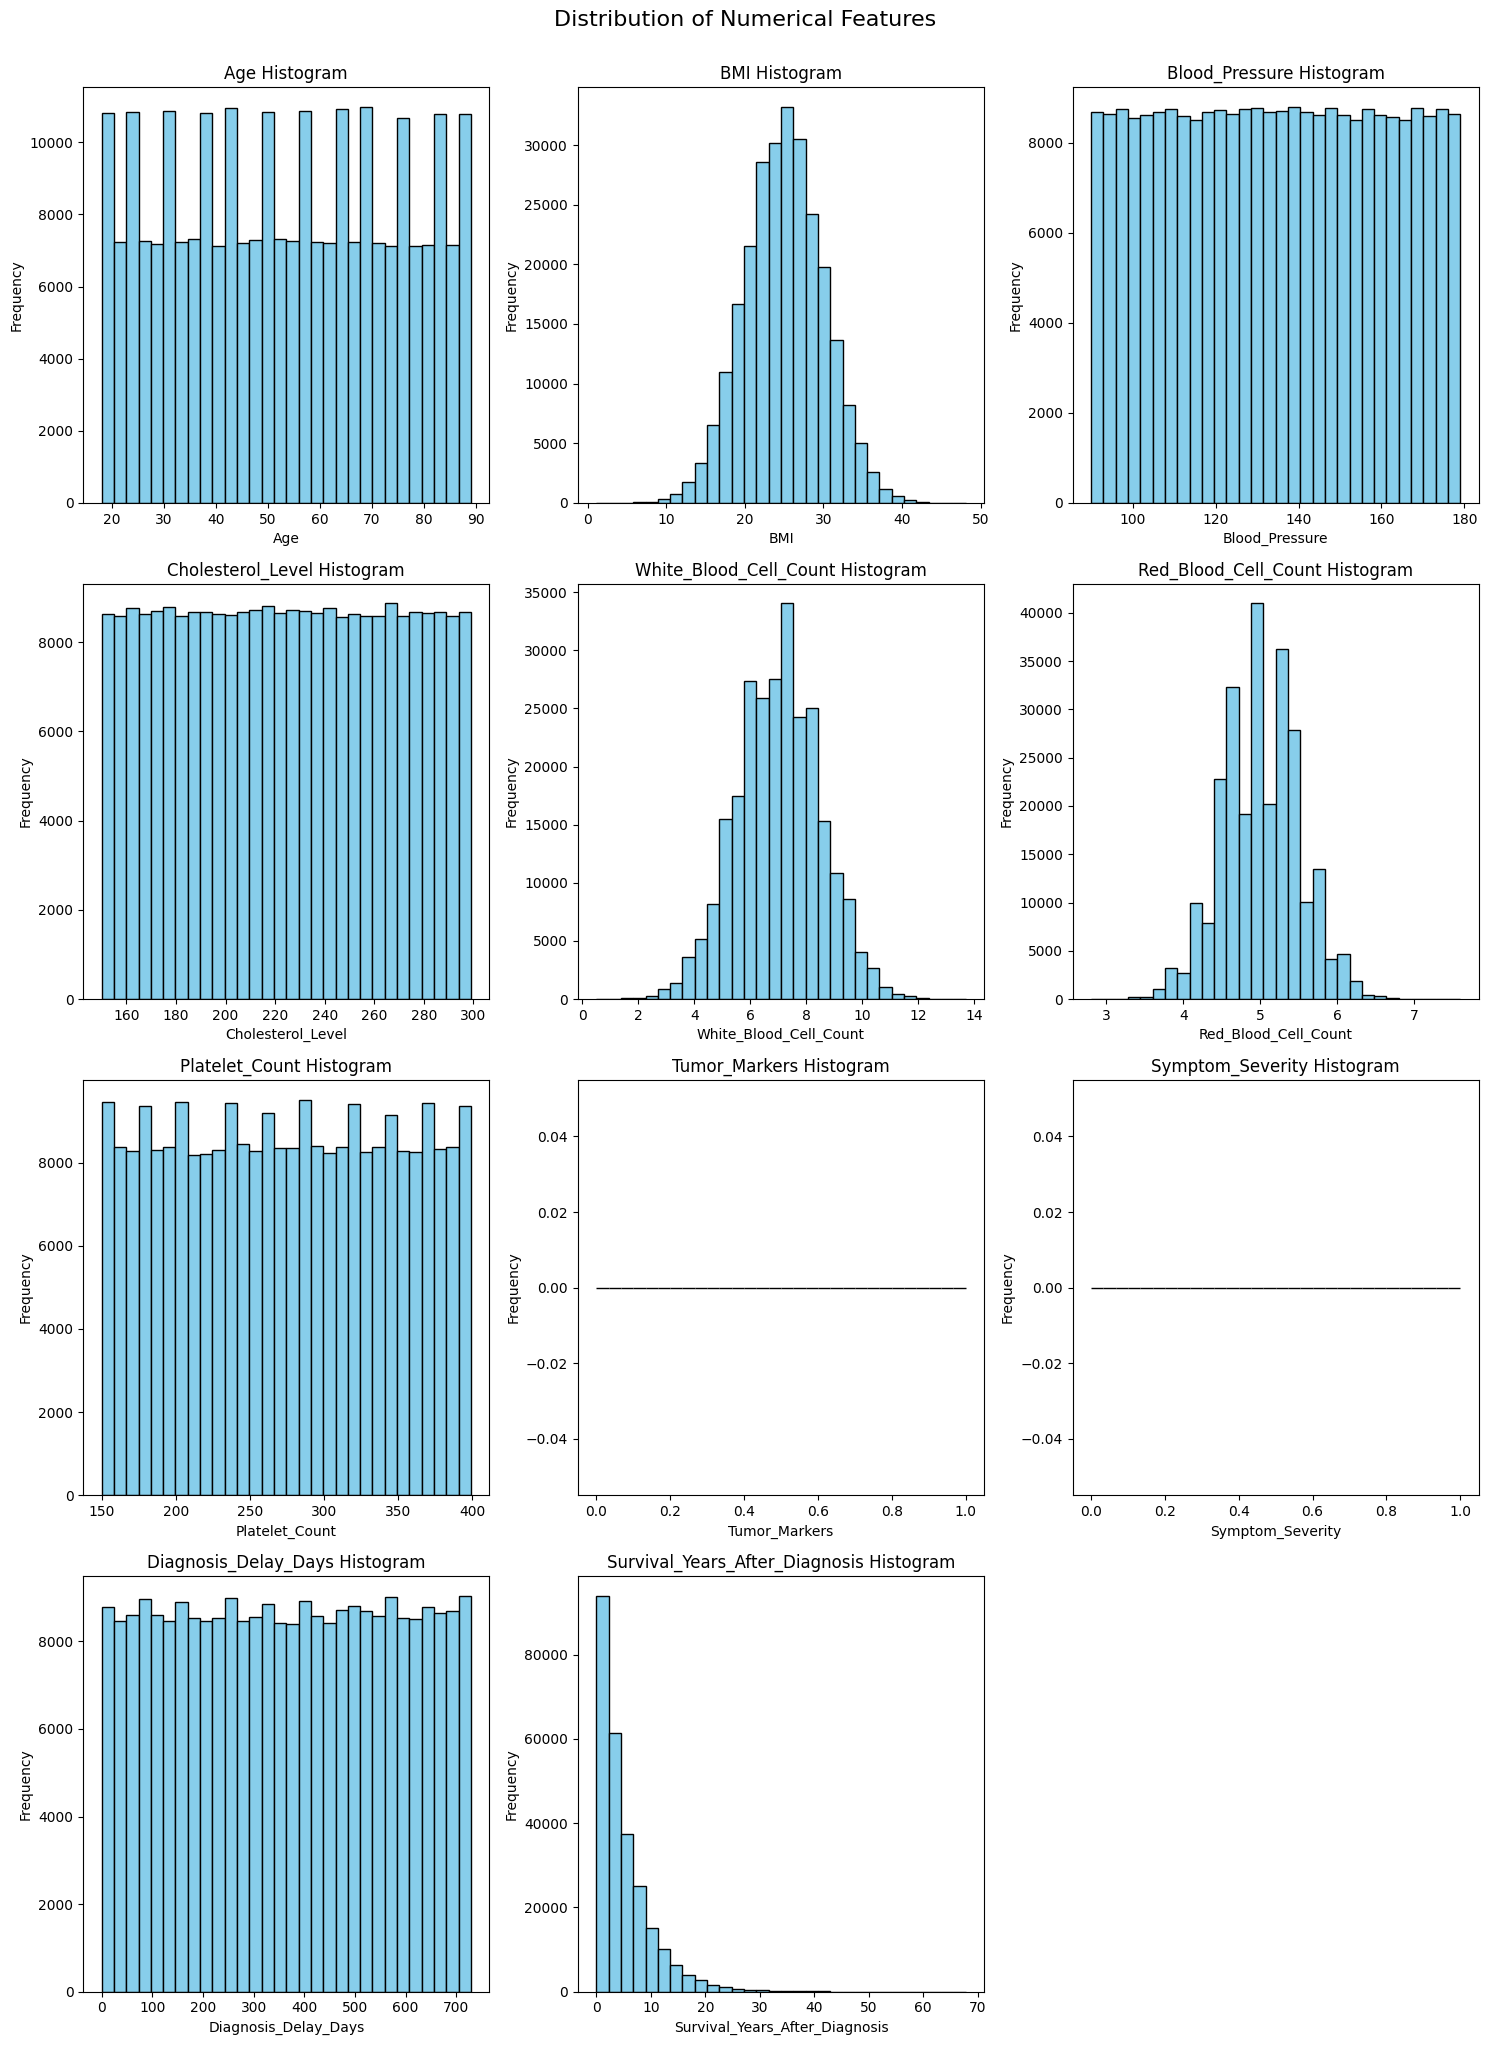

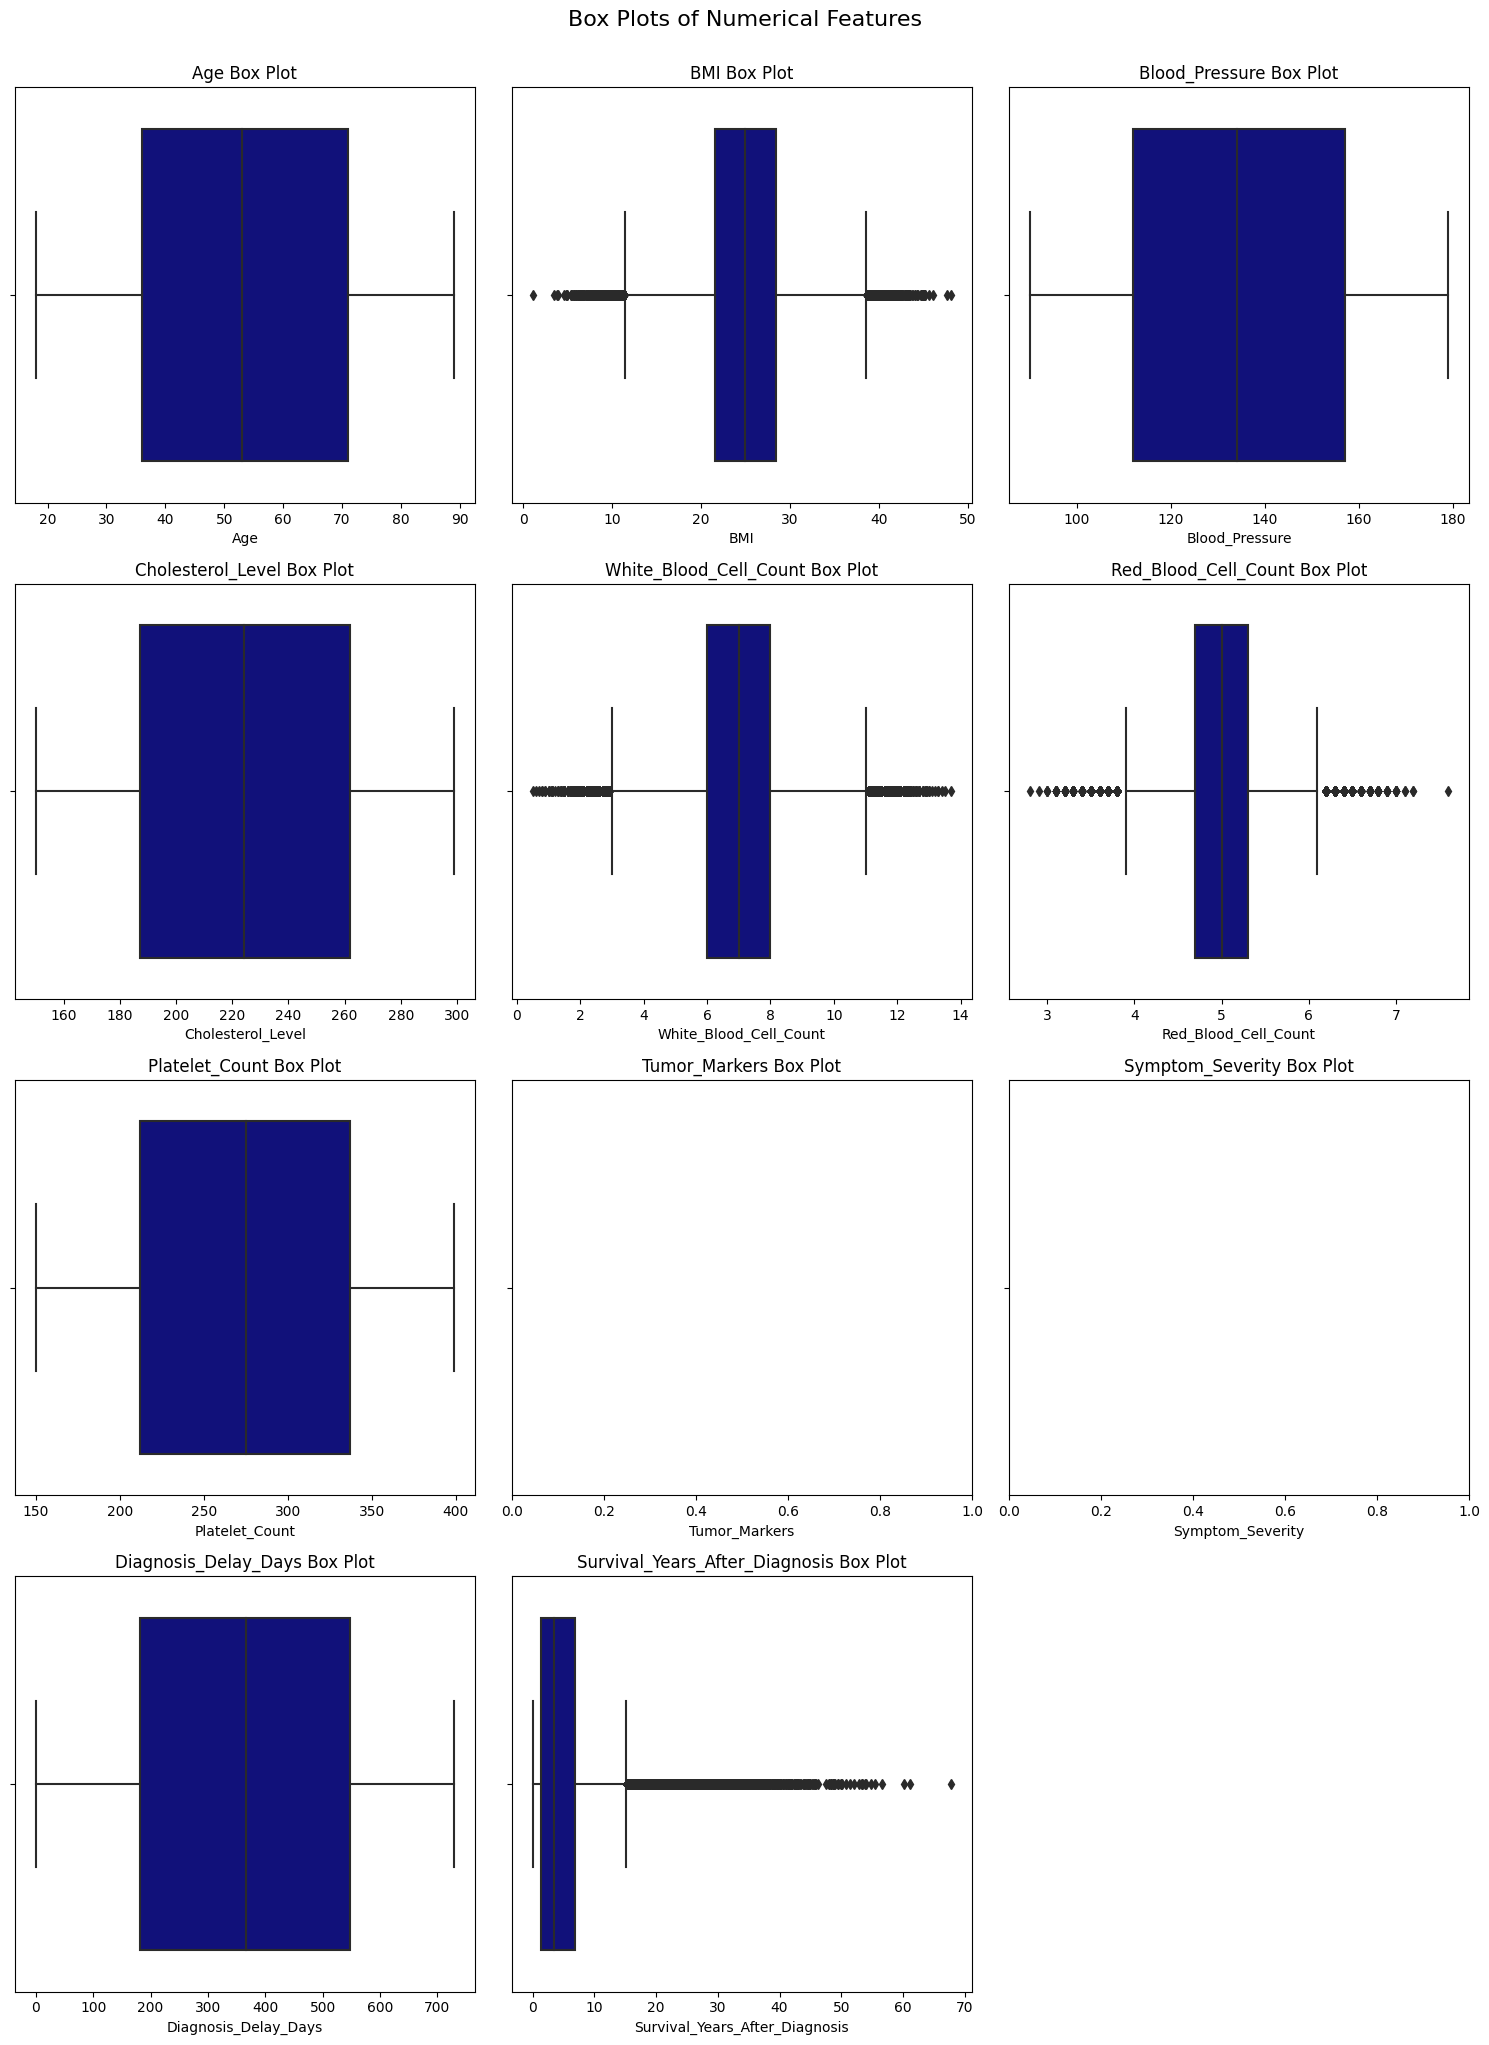

In [22]:
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns
n_cols = 3  
n_rows = int(np.ceil(len(numerical_cols) / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    # Histogram
    axes[i].hist(data[col].dropna(), bins=30, edgecolor="black", color='skyblue')
    axes[i].set_title(f"{col} Histogram")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", fontsize=16, y=1.02)
plt.show()

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(ax=axes[i], x=data[col], color='darkblue')
    axes[i].set_title(f"{col} Box Plot")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Box Plots of Numerical Features", fontsize=16, y=1.02)
plt.show()

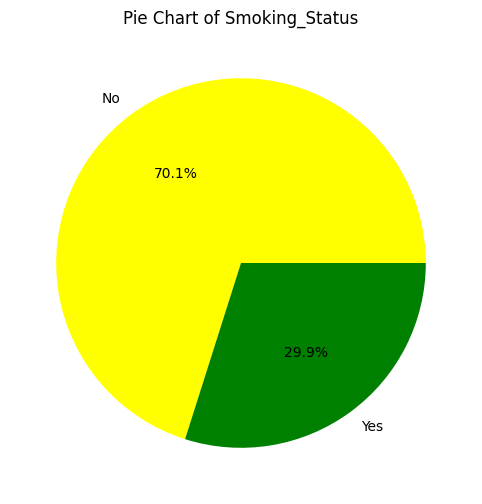

In [23]:
categorical_column = 'Smoking_Status'
plt.figure(figsize=(8, 6))
data[categorical_column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'green'])
plt.title(f"Pie Chart of {categorical_column}")
plt.ylabel('')  # Hide the y-axis label
plt.show()

In [24]:
numerical_df = data.select_dtypes(include=["int64", "float64"])

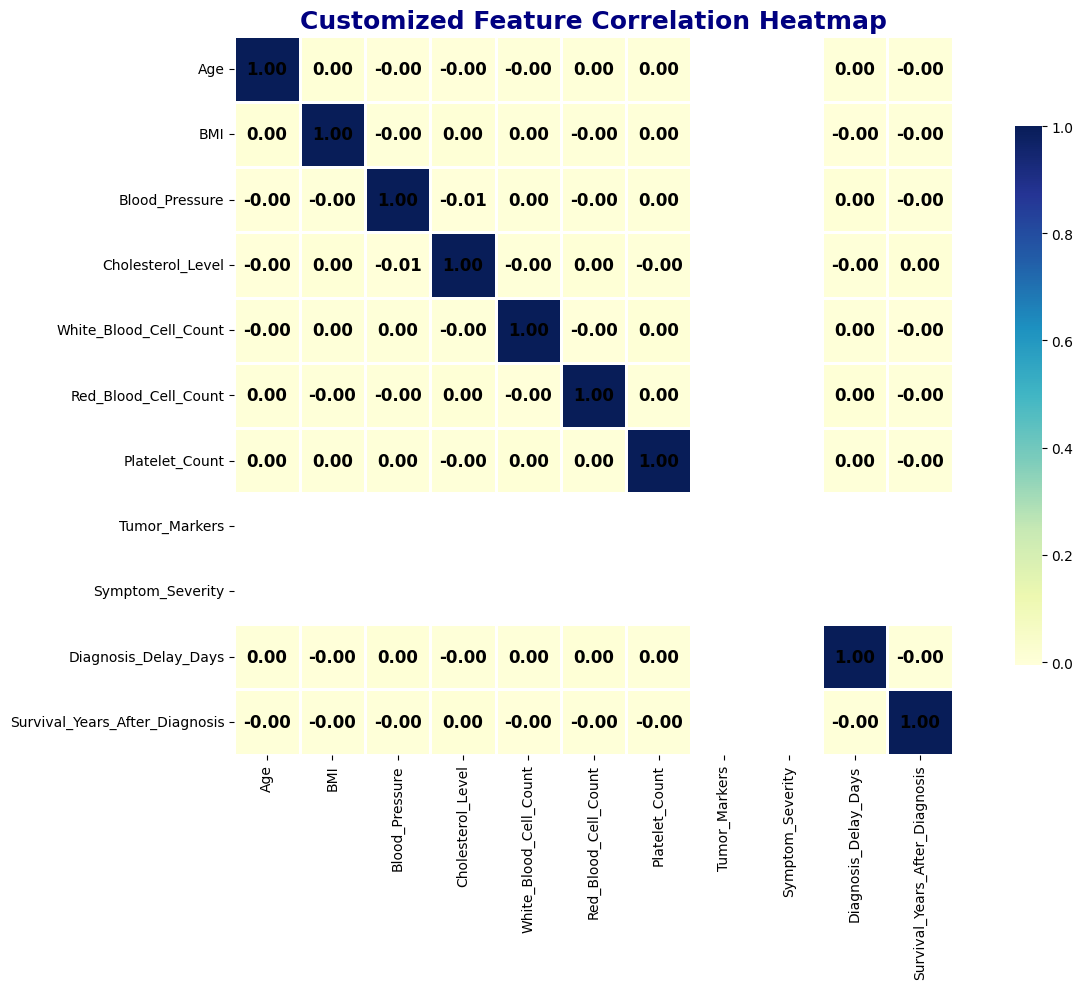

In [25]:
corr_matrix = numerical_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="YlGnBu", 
    linewidths=1,  
    fmt=".2f",
    annot_kws={"size": 12, "weight": "bold", "color": "black"},  
    cbar_kws={"shrink": 0.75},  # Resize color bar
    square=True  
)
plt.title("Customized Feature Correlation Heatmap", fontsize=18, weight='bold', color='navy')
plt.tight_layout()  # Ensure everything fits well
plt.show()

## Outliers

In [26]:
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum()
sorted_outliers = outlier_counts.sort_values(ascending=False)
print(sorted_outliers)

Survival_Years_After_Diagnosis    12477
Red_Blood_Cell_Count               5615
White_Blood_Cell_Count             1772
BMI                                1743
Age                                   0
Blood_Pressure                        0
Cholesterol_Level                     0
Platelet_Count                        0
Tumor_Markers                         0
Symptom_Severity                      0
Diagnosis_Delay_Days                  0
dtype: int64


In [27]:
# Step 1: Calculate the IQR for each numerical column
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the condition for non-outliers
non_outliers_condition = ~((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR)))

# Step 3: Apply the condition to filter out outliers (keep non-outliers only)
df_no_outliers = data[non_outliers_condition.all(axis=1)]

# Step 4: Show the shape of the original and filtered dataset
print(f"Original dataset shape: {data.shape}")
print(f"Filtered dataset shape (no outliers): {df_no_outliers.shape}")


Original dataset shape: (260000, 25)
Filtered dataset shape (no outliers): (238936, 25)


In [28]:
categorical_cols = data.select_dtypes(include=["object"]).columns

In [29]:
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("-" * 50)

Value counts for Patient_ID:
Patient_ID
PID_000001    1
PID_173339    1
PID_173326    1
PID_173327    1
PID_173328    1
             ..
PID_086672    1
PID_086673    1
PID_086674    1
PID_086675    1
PID_260000    1
Name: count, Length: 260000, dtype: int64
--------------------------------------------------
Value counts for Country:
Country
USA             40685
India           35350
China           32628
Brazil          27368
Russia          21716
Germany         16544
UK              13574
France          10814
Canada           8244
Australia        8135
Italy            8109
South Korea      5554
Japan            5457
Turkey           4110
Mexico           4029
Saudi Arabia     2712
Indonesia        2691
South Africa     2624
Argentina        1438
Spain            1430
Norway           1390
Netherlands      1375
Poland           1365
Egypt            1364
Sweden           1294
Name: count, dtype: int64
--------------------------------------------------
Value counts for Gender:
Gende

In [30]:
# Define the selected features
selected_features = [
    "Age", "BMI", "Chronic_Diseases", "Tumor_Markers", "Symptom_Severity",
    "Diagnosis_Delay_Days", "Treatment_Type", "Smoking_Status", "Alcohol_Consumption",
    "Family_History_Cancer", "Genetic_Mutations", "Radiation_Exposure", "Previous_Cancers",
    "Survival_Years_After_Diagnosis" 
]
df_selected = data[selected_features]


In [31]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Define the categorical columns that need encoding
categorical_cols = [
    "Chronic_Diseases", "Tumor_Markers", "Symptom_Severity", 
    "Treatment_Type", "Smoking_Status", "Alcohol_Consumption", 
    "Family_History_Cancer", "Genetic_Mutations", "Radiation_Exposure", 
    "Previous_Cancers"
]

# Step 2: Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Step 3: Apply the LabelEncoder to each categorical column
for col in categorical_cols:
    df_selected[col] = label_encoder.fit_transform(df_selected[col])

# Step 4: Display the first few rows after encoding
print(df_selected.head())

   Age   BMI  Chronic_Diseases  Tumor_Markers  Symptom_Severity  \
0   67  28.6                 0              0                 0   
1   83  19.4                 0              0                 0   
2   52  17.2                 0              0                 0   
3   71  31.8                 2              0                 0   
4   19  17.7                 1              0                 0   

   Diagnosis_Delay_Days  Treatment_Type  Smoking_Status  Alcohol_Consumption  \
0                   691               3               0                    1   
1                   275               0               0                    1   
2                   668               0               0                    1   
3                   256               2               1                    1   
4                   370               2               0                    1   

   Family_History_Cancer  Genetic_Mutations  Radiation_Exposure  \
0                      1                  0      

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

In [33]:
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Extra Trees Regressor': ExtraTreesRegressor(n_estimators=50, random_state=42, n_jobs=-1)
}

# Step 2: Prepare data for training and testing
X = df_selected.drop(columns=["Survival_Years_After_Diagnosis"])
y = df_selected["Survival_Years_After_Diagnosis"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize results dictionary to store evaluation metrics
results = {}

# Step 4: Train and evaluate each model
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the result for each model
    results[model_name] = {'MSE': mse}

# Step 5: Display the results for each model
print("Model Evaluation Results:")
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {result['MSE']:.4f}")
    print("-" * 50)

Model Evaluation Results:
Ridge Regression:
  Mean Squared Error: 24.8207
--------------------------------------------------
Lasso Regression:
  Mean Squared Error: 24.8195
--------------------------------------------------
SGD Regressor:
  Mean Squared Error: 72575794280307649738178560.0000
--------------------------------------------------
Extra Trees Regressor:
  Mean Squared Error: 29.0878
--------------------------------------------------


## Thank you